In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm

In [15]:
print(sys.version)
print(torch.__version__)

3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
2.1.0+cu121


In [16]:
class PlayingCardDataset(Dataset):
    
    def __init__(self, data_dir,transform=None):

        self.data = ImageFolder(data_dir,transform=transform)

    

    def __len__(self):

        return len(self.data)
    

    def __getitem__(self,idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [17]:
dataset = PlayingCardDataset(data_dir='D:\\vscode\\Pistachio Image Dataset\\output\\train')
len(dataset)

1717

In [18]:
dataset[9]

(<PIL.Image.Image image mode=RGB size=600x600>, 0)

1


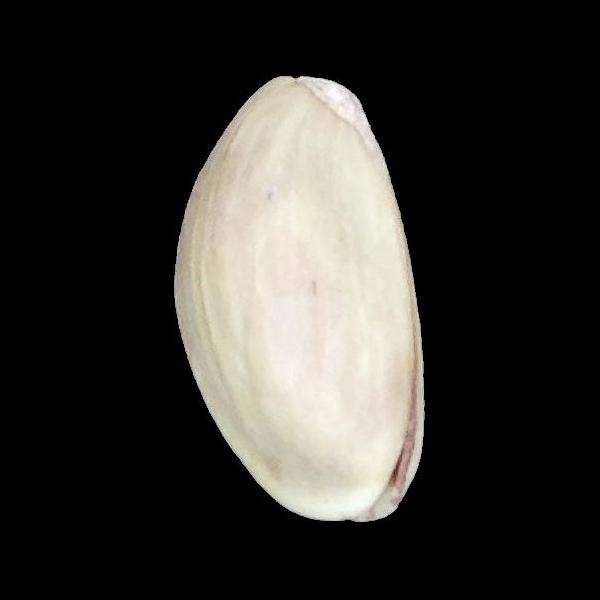

In [19]:
image, label =dataset[1000]
print(label)
image

In [20]:
data_dir = 'D:\\vscode\\Pistachio Image Dataset\\output\\train'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'Kirmizi_Pistachio', 1: 'Siirt_Pistachio'}


In [21]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

data_dir = 'D:\\vscode\\Pistachio Image Dataset\\output\\train'
dataset = PlayingCardDataset(data_dir, transform)

In [24]:
dataset[100]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

In [25]:
dataloder=DataLoader(dataset,batch_size=32,shuffle=True)

In [26]:
for images,label in dataloder:
    break

In [27]:
images.shape

torch.Size([32, 3, 224, 224])

In [28]:
label

tensor([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0])

In [29]:
class SimpleCardClassifier(nn.Module):
    
    def __init__(self,num_classes=53):
        super(SimpleCardClassifier,self).__init__()
        self.base_model = timm.create_model('efficientnet_b0',pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        self.classifier = nn.Linear(enet_out_size,num_classes)
    
    def forward(self,x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [30]:
model = SimpleCardClassifier(num_classes=53)

model.safetensors: 100%|██████████| 21.4M/21.4M [00:02<00:00, 7.43MB/s]
c:\Users\skyra\anaconda3\envs\tf\lib\site-packages\huggingface_hub\file_download.py:138: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\skyra\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [31]:
print(str(model)[:500])

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fa


In [32]:
example_out=model(images)
example_out.shape

torch.Size([32, 53])

In [40]:
# Loss Functions
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

In [41]:
criterion(example_out,label)

tensor(3.8748, grad_fn=<NllLossBackward0>)

In [35]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = 'D:\\vscode\\Pistachio Image Dataset\\output\\train'
valid_folder = 'D:\\vscode\\Pistachio Image Dataset\\output\\val'
test_folder = 'D:\\vscode\\Pistachio Image Dataset\\output\\test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [36]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifier(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

c:\Users\skyra\anaconda3\envs\tf\lib\site-packages\torch\cuda\__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
Validation loop: 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]


Epoch 1/5 - Train loss: 0.49025173491354107, Validation loss: 0.4052129972760922


Validation loop: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]


Epoch 2/5 - Train loss: 0.10417273714400754, Validation loss: 0.09398088419688082


Validation loop: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


Epoch 3/5 - Train loss: 0.05704215035953352, Validation loss: 0.3644649717373617


Validation loop: 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]


Epoch 4/5 - Train loss: 0.029557922833323064, Validation loss: 0.09213222968489994


Validation loop: 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

Epoch 5/5 - Train loss: 0.053441680782845044, Validation loss: 0.3393484847369211


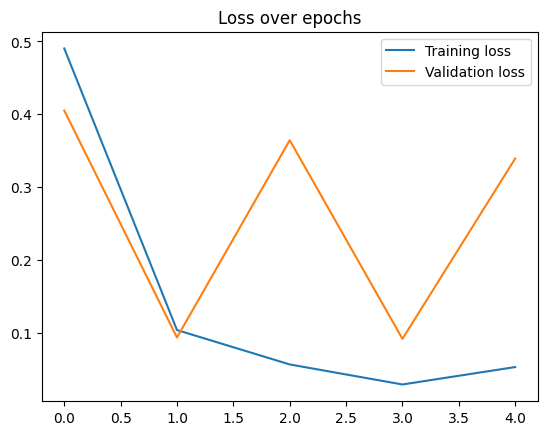

In [37]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()
